In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [8]:
df = pd.read_csv('5000_anime_combined.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               2500 non-null   object 
 1   genre               2500 non-null   object 
 2   studio              2494 non-null   object 
 3   number_of_episodes  2466 non-null   float64
 4   release_date        2488 non-null   object 
 5   content_type        2500 non-null   object 
 6   viewer_reviews      2466 non-null   float64
 7   source              2500 non-null   object 
dtypes: float64(2), object(6)
memory usage: 156.4+ KB


In [14]:
df.shape

(2500, 8)

In [18]:
print("🎌 ANIME DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Total Anime: {len(df)}")
print(f"Total Features: {len(df.columns)}")

🎌 ANIME DATASET OVERVIEW
Dataset Shape: (2500, 8)
Total Anime: 2500
Total Features: 8


In [26]:
print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,title,genre,studio,number_of_episodes,release_date,content_type,viewer_reviews,source
0,Attack on Titan,"Action, Drama, Fantasy, Mystery",WIT STUDIO,25.0,2013-04,Tv,84.0,AniList
1,Demon Slayer: Kimetsu no Yaiba,"Action, Adventure, Drama, Fantasy, Supernatural",ufotable,26.0,2019-04,Tv,82.0,AniList
2,Death Note,"Mystery, Psychological, Supernatural, Thriller",MADHOUSE,37.0,2006-10,Tv,84.0,AniList
3,JUJUTSU KAISEN,"Action, Drama, Supernatural",Toho,24.0,2020-10,Tv,85.0,AniList
4,My Hero Academia,"Action, Adventure, Comedy",bones,13.0,2016-04,Tv,76.0,AniList


In [28]:
print("\n📋 DATASET INFO:")
df.info()


📋 DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               2500 non-null   object 
 1   genre               2500 non-null   object 
 2   studio              2494 non-null   object 
 3   number_of_episodes  2466 non-null   float64
 4   release_date        2488 non-null   object 
 5   content_type        2500 non-null   object 
 6   viewer_reviews      2466 non-null   float64
 7   source              2500 non-null   object 
dtypes: float64(2), object(6)
memory usage: 156.4+ KB


In [30]:
print("\n📈 BASIC STATISTICS:")
df.describe(include='all')


📈 BASIC STATISTICS:


,title,genre,studio,number_of_episodes,release_date,content_type,viewer_reviews,source
count,2500,2500,2494,2466.000000,2488,2500,2466.000000,2500
unique,2500,691,270,NaN,337,8,NaN,1
top,Attack on Titan,"Comedy, Slice of Life",J.C.STAFF,NaN,2023-01,Tv,NaN,AniList
freq,1,97,116,NaN,39,1755,NaN,2500
mean,NaN,NaN,NaN,15.034874,NaN,NaN,71.931873,NaN
std,NaN,NaN,NaN,24.575710,NaN,NaN,7.831661,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,21.000000,NaN
25%,NaN,NaN,NaN,10.000000,NaN,NaN,67.000000,NaN
50%,NaN,NaN,NaN,12.000000,NaN,NaN,72.000000,NaN
75%,NaN,NaN,NaN,13.000000,NaN,NaN,77.000000,NaN


In [40]:
for column in df.columns:
    print(f"{column} have {df[column].nunique()} unique values")

title have 2500 unique values
genre have 691 unique values
studio have 270 unique values
number_of_episodes have 96 unique values
release_date have 337 unique values
content_type have 8 unique values
viewer_reviews have 52 unique values
source have 1 unique values


In [58]:
print("DATA CLEANING")
print ("=" * 50)

#Chcek For missing Values
missing_values = df.isna().sum()
missing_percent = (missing_values/len(df))*100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage':missing_percent
}).sort_values('Missing Count',ascending = False)
print(missing_df)

DATA CLEANING
                    Missing Count  Missing Percentage
number_of_episodes             34                1.36
viewer_reviews                 34                1.36
release_date                   12                0.48
studio                          6                0.24
title                           0                0.00
genre                           0                0.00
content_type                    0                0.00
source                          0                0.00


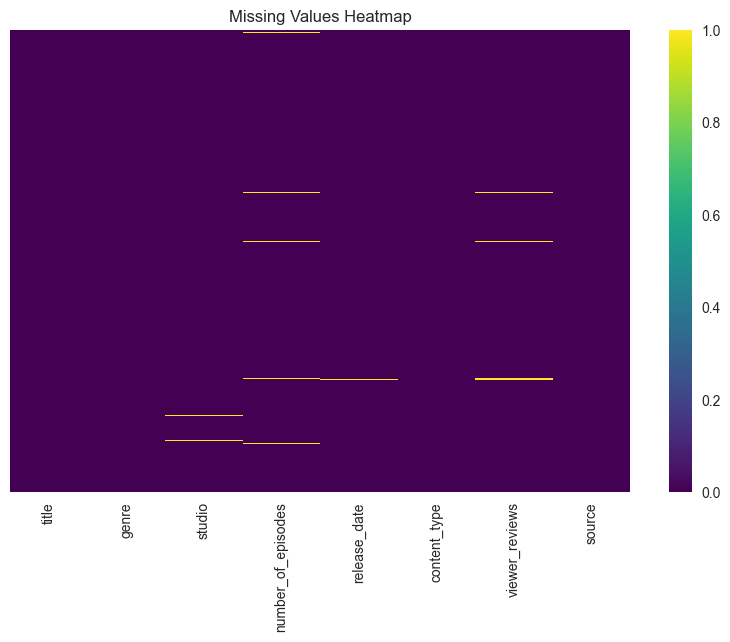

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [62]:
df_clean = df.copy()

In [64]:
df_clean['genre'] = df_clean['genre'].fillna('Unknown')
df_clean['studio'] = df_clean['studio'].fillna('Unknown')
df_clean['number_of_episodes'] = df_clean['number_of_episodes'].fillna('0')
df_clean['release_date'] = df_clean['release_date'].fillna('Unknown')
df_clean['content_type'] = df_clean['content_type'].fillna('Unknown')
df_clean['viewer_reviews'] = df_clean['viewer_reviews'].fillna('0')

In [66]:
df_clean.isna().sum()

title                 0
genre                 0
studio                0
number_of_episodes    0
release_date          0
content_type          0
viewer_reviews        0
source                0
dtype: int64

In [68]:
df_clean['number_of_episodes'] = pd.to_numeric(df_clean['number_of_episodes'], errors='coerce').fillna(0).astype(int)
df_clean['viewer_reviews'] = pd.to_numeric(df_clean['viewer_reviews'], errors='coerce').fillna(0)


In [70]:
df.head()

,title,genre,studio,number_of_episodes,release_date,content_type,viewer_reviews,source
0,Attack on Titan,"Action, Drama, Fantasy, Mystery",WIT STUDIO,25.0,2013-04,Tv,84.0,AniList
1,Demon Slayer: Kimetsu no Yaiba,"Action, Adventure, Drama, Fantasy, Supernatural",ufotable,26.0,2019-04,Tv,82.0,AniList
2,Death Note,"Mystery, Psychological, Supernatural, Thriller",MADHOUSE,37.0,2006-10,Tv,84.0,AniList
3,JUJUTSU KAISEN,"Action, Drama, Supernatural",Toho,24.0,2020-10,Tv,85.0,AniList
4,My Hero Academia,"Action, Adventure, Comedy",bones,13.0,2016-04,Tv,76.0,AniList


In [72]:
df_clean['release_year'] = df_clean['release_date'].str.extract(r'(\d{4})').astype(float)

In [78]:
df_clean = df_clean.dropna()

In [86]:
print(f"✅ Cleaned dataset shape: {df_clean.shape}")
print(f"Missing values after cleaning: {df_clean.isnull().sum().sum()}")

✅ Cleaned dataset shape: (2488, 9)
Missing values after cleaning: 0


In [88]:
df_clean.isna().sum()

title                 0
genre                 0
studio                0
number_of_episodes    0
release_date          0
content_type          0
viewer_reviews        0
source                0
release_year          0
dtype: int64

#BASIC STATISTICS

In [96]:
print('BASIC STATISTICS')
print("="*50)
total_anime = len(df_clean)
unique_studios = df_clean['studio'].nunique()
unique_genres = len([g.strip() for genres in df_clean['genre'].str.split(',') for g in genres if g.strip() != 'Unknown'])
avg_episodes = df_clean[df_clean['number_of_episodes'] > 0]['number_of_episodes'].mean()
avg_rating = df_clean[df_clean['viewer_reviews'] > 0]['viewer_reviews'].mean()

print(f"📺 Total Anime: {total_anime:,}")
print(f"🏢 Unique Studios: {unique_studios:,}")
print(f"🎭 Total Genre Mentions: {unique_genres:,}")
print(f"📈 Average Episodes: {avg_episodes:.1f}")
print(f"⭐ Average Rating: {avg_rating:.1f}")

BASIC STATISTICS
📺 Total Anime: 2,488
🏢 Unique Studios: 271
🎭 Total Genre Mentions: 8,645
📈 Average Episodes: 15.1
⭐ Average Rating: 71.9
